<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/keras_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow as tf

print('keras', keras.__version__)
print('tf', tf.__version__)
print('K.image_data_format()', K.image_data_format())

Using TensorFlow backend.


keras 2.3.1
tf 2.2.0
K.image_data_format() channels_last


In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

11493376/11490434 [==============================] - 0s 0us/step


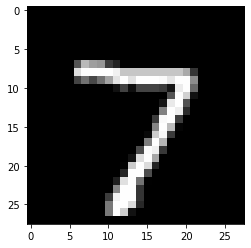

In [2]:
batch_size = 128
num_classes = 10
epochs = 1
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_test[0])
plt.gray()
plt.show()

In [0]:
def condition_data(channels_first, raw):
    shaped = raw.reshape(raw.shape[0], 1, img_rows, img_cols) if channels_first else raw.reshape(raw.shape[0], img_rows, img_cols, 1)
    
    shaped = shaped.astype('float32')
    shaped /= 255
    return shaped

In [4]:
channels_first = K.image_data_format() == 'channels_first'
input_shape = (1, img_rows, img_cols) if channels_first else (img_rows, img_cols, 1)
x_train = condition_data(channels_first, x_train)
x_test = condition_data(channels_first, x_test)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
print(y_test[0])

7


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 147s 2ms/step - loss: 0.2719 - accuracy: 0.9155 - val_loss: 0.0566 - val_accuracy: 0.9815
Test loss: 0.05664086830513552
Test accuracy: 0.9815000295639038


Colab No GPU: 130s    
Colab GPU: 12s    
System76 No GPU: 69s
System76 With GPU 


In [8]:
print(model.predict(x_test[0:5]) > 0.95)

[[False False False False False False False  True False False]
 [False False  True False False False False False False False]
 [False  True False False False False False False False False]
 [ True False False False False False False False False False]
 [False False False False  True False False False False False]]
